In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
import numpy as np

: 

In [2]:
train = pd.read_csv('https://github.com/tknishh/Text-Classification-Ag-News/raw/master/data/train.csv')
test = pd.read_csv('https://github.com/tknishh/Text-Classification-Ag-News/raw/master/data/test.csv')

In [3]:
train.sample(5)

,Class Index,Title,Description
46008,1,Takenaka Says Tankan Confirms Japan #39;s Stea...,The Bank of Japan #39;s quarterly survey of bu...
7760,3,Oil Troublesome Says a Fed President,WASHINGTON (Reuters) - Record oil prices are ...
109997,2,Gerrard issues warning,"The Merseyside captain, his professional caree..."
99536,2,"Timberwolves 83, Mavericks 82",Kevin Garnett made two free throws with 5.9 se...
106701,4,The biggest game of the year,"I look at quot;Grand Theft Auto: San Andreas,..."


# Categorias
* World
* Sports
* Business
* Science/Technology

In [4]:
train[train['Class Index'] == 1].sample(10)['Title']

9366                                Nice Witch of the North
33160                      Iraqi PM to Make U.N. Debut (AP)
77540          Alabama Congressional Candidate Injured (AP)
11340                       Taiwan typhoon death toll rises
31964               Americans Wake Up on Day 2 of Ryder Cup
110184    Security in Sudan Deteriorating, UN Official W...
33129     Far-Right Surge in East Alarms Mainstream Germany
57305        Dollar perks up from Friday's jobs slump (AFP)
65916          Terror Leader Said Plotted Spain Attack (AP)
39238     N.Korea Silent as Japan Raises Missile Issue-K...
Name: Title, dtype: object

In [5]:
train[train['Class Index'] == 2].sample(10)['Title']

105762        Bucs Cut Veteran Kicker Martin Gramatica (AP)
109415         Seattle Catcher Dan Wilson OKs Contract (AP)
67255            Area fans: Huskies #39; reputation damaged
56659                                   News Items In Brief
10445               Feeling relaxed not Hartley #39;s style
99352     Pountney holds the fort after divided Saints s...
76418                 Del Piero, Zalayeta score in home win
86218         Silverstone gets green light for GP next year
57021               Virus ends season for former number one
106557                                    Phonak Rips Apart
Name: Title, dtype: object

In [6]:
train[train['Class Index'] == 3].sample(10)['Title']

99057                          M'm! M'm! Could Be Better!
22598        Fed Chairman: US Economic Recovery Continues
86913                     Stocks Flat; Cisco, Pfizer Down
62055     Sprint to cut 700 jobs as it trims back service
65135            Insurance Probe Woes Deflate Stock Rally
18713      Aide: Kerry Would Shift Trade Focus Toward WTO
73820                        Dollar Inches Up Versus Euro
60267               Bank seeing unexpected customer gains
104011          Dollar Rests After Sharp Losses (Reuters)
8881             Dollar Rallies, But Real Money Sidelined
Name: Title, dtype: object

In [7]:
train[train['Class Index'] == 4].sample(10)['Title']

51015         Microsoft Unveils News Version of MSN TV (AP)
38236      BOFH: What to do when the Boss gets touchy-feely
58823     PeopleSoft chairman says bid needed different ...
10023                    Jamaica to provide free Net access
18088              Space station crew does some repair work
50449     AT T Wireless Launching New Music Download Ser...
117131    STATE OF THE ART Evaluating the Rivals to IPod...
28238                              AOL: Back to the Future?
110169            Apple in cybersquatting fight over iTunes
119256                         Motorola/Apple Phone Details
Name: Title, dtype: object

In [8]:
train['content'] = train['Title'] + " " + train['Description']
test['content'] = test['Title'] + " " + test['Description']

# Information Retrieval

In [9]:
ir_dataset = pd.concat([train, test], ignore_index=True)['content'].tolist()

In [10]:
ir_dataset[:5]

["Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again.",
 'Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\\which has a reputation for making well-timed and occasionally\\controversial plays in the defense industry, has quietly placed\\its bets on another part of the market.',
 "Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worries\\about the economy and the outlook for earnings are expected to\\hang over the stock market next week during the depth of the\\summer doldrums.",
 'Iraq Halts Oil Exports from Main Southern Pipeline (Reuters) Reuters - Authorities have halted oil export\\flows from the main pipeline in southern Iraq after\\intelligence showed a rebel militia could strike\\infrastructure, an oil official said on Saturday.',
 'Oil prices soar to all-time record, posing new menace to US economy (A

## TF-IDF

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
vectorizer = TfidfVectorizer(lowercase=True,
                             stop_words='english',
                             ngram_range=(1, 1),
                             max_features=10000,
                             binary=False,
                             use_idf=True)

* `lowercase`: si pasar todo a minuscula antes de tokenizar
* `stop_words`: cuales stopwords ignorar
* `max_features`: cantidad máxima de palabras
* `binary`: si es True, esto es BOW
* `use_idf`: si es False, no se usa IDF

Podemos lograr:
* BOW: con binary=True
* TF: con use_idf=False



In [13]:
vector_array = vectorizer.fit_transform(ir_dataset)

In [14]:
vector_array

<127600x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2475150 stored elements in Compressed Sparse Row format>

Es una matriz dispersa. ¿Cúanto ocuparía si no fuera dispersa?

### PCA

In [15]:
from sklearn.decomposition import TruncatedSVD

In [16]:
reducer = TruncatedSVD(n_components=300)
vector_array = reducer.fit_transform(vector_array)
vector_array

array([[ 8.39271730e-02,  2.84070838e-03,  8.27788553e-02, ...,
        -1.61973520e-02, -9.47309198e-03,  5.65744831e-02],
       [ 9.69133342e-02, -1.19461835e-02,  6.60950052e-02, ...,
        -1.31337392e-02,  2.79237588e-02,  9.62230218e-03],
       [ 1.61118161e-01, -8.63592729e-03,  2.91816957e-01, ...,
         2.78213790e-04, -2.52669838e-02, -3.18713222e-02],
       ...,
       [ 3.75165728e-02, -3.49327811e-02, -2.03496887e-02, ...,
        -3.09117998e-02, -4.55784139e-03,  3.08011956e-02],
       [ 1.76107846e-01,  1.86821316e-01, -9.36967059e-02, ...,
        -1.94898356e-02, -2.08392388e-02,  2.47824412e-02],
       [ 5.47095384e-02, -1.00178773e-02, -2.27492170e-04, ...,
        -2.52258038e-02, -3.69440640e-02, -3.93228229e-04]])

### Búsqueda

In [17]:
from sklearn.neighbors import NearestNeighbors

In [18]:
nbrs = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='cosine').fit(vector_array)

In [19]:
q = input("Ingrese búsqueda ")
distances, indices = nbrs.kneighbors(reducer.transform(vectorizer.transform([q])))
for d, i in zip(distances[0], indices[0]):
  print(f"El resultado {i+1} con distancia {d} es:")
  print(ir_dataset[i])

El resultado 85068 con distancia 1.0 es:
Musharraf formula is casual: Union Home Minister Octroi Post Near The International Border, Nov 7 (UNI) Union Home Minister Shivraj Patil today said the graph of infiltration had come down in Jammu and Kashmir this year due to fencing of borders neighbouring Pakistan.
El resultado 85066 con distancia 1.0 es:
Lenard out at least six months after left leg surgery Nuggets shooting guard Voshon Lenard will be sidelined at least six months after surgery Monday on his torn left Achilles #39; tendon.
El resultado 85070 con distancia 1.0 es:
Taiwan Hit by Magnitude 6.7 Quake; No Casualties (Update2) Taiwan was rocked by a magnitude 6.7 earthquake, whose epicenter was located southeast of the capital of Taipei. There were no immediate reports of casualties, according to the island #39;s Ministry of Interior.
El resultado 85067 con distancia 1.0 es:
Lebanon justifies drone #39;s dispatch The Lebanese government justified Hezbollah #39;s launching of a dro

# Clasificación

In [20]:
vectorizer = TfidfVectorizer(lowercase=True,
                             stop_words='english',
                             ngram_range=(1, 1),
                             max_features=10000,
                             binary=False,
                             use_idf=True)
reducer = TruncatedSVD(n_components=300)

# Esto es porque validation_split se sklearn no es random
train_shuffled = train.sample(len(train))

train_X = reducer.fit_transform(vectorizer.fit_transform(train_shuffled['content']))
# -1 porque keras espera que empiece en 0
train_y = (train_shuffled['Class Index'] - 1).values

In [21]:
train_X.shape, train_y.shape

((120000, 300), (120000,))

In [22]:
test_X = reducer.transform(vectorizer.transform(test['content']))
test_y = (test['Class Index'] - 1).values

In [23]:
test_X.shape, test_y.shape

((7600, 300), (7600,))

# KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
model = KNeighborsClassifier(n_neighbors=17, algorithm='brute', metric='cosine')
model.fit(train_X, train_y)

KNeighborsClassifier(algorithm='brute', metric='cosine', n_neighbors=17)

In [26]:
preds = model.predict(test_X)

In [27]:
accuracy_score(test_y, preds)

0.8639473684210527

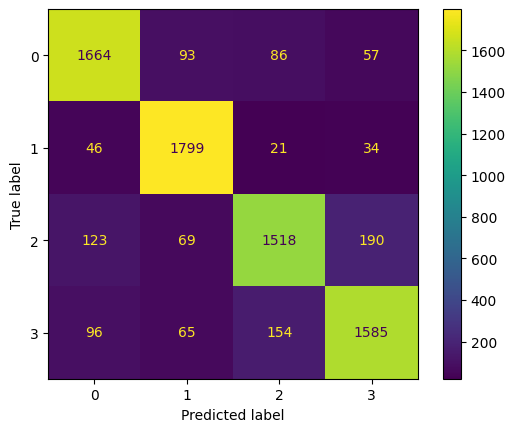

In [28]:
ConfusionMatrixDisplay(confusion_matrix(test_y, preds)).plot()

## Red neuronal

In [29]:
from tensorflow.keras.layers import Input, Dense, UnitNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping


2024-11-13 16:38:01.324838: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-13 16:38:01.444185: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-13 16:38:01.496616: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-13 16:38:01.510161: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-13 16:38:01.597408: I tensorflow/core/platform/cpu_feature_guar

In [30]:
inp = Input((300,))
# opcional: hago cada vector de norma 1, me importa más que nada su ángulo
inp = UnitNormalization()(inp)
dense1 = Dense(128, activation='tanh')(inp)
dense2 = Dense(64, activation='tanh')(dense1)
dense3 = Dense(32, activation='tanh')(dense2)
final = Dense(4, activation='softmax')(dense2)

model = Model(inputs=inp, outputs=final)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ keras_tensor_1CLONE             │ (None, 300)            │             0 │
│ (InputLayer)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,044 (183.77 KB)

 Trainable params: 47,044 (183.77 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

model.fit(train_X, train_y, epochs=60, validation_split=0.1, callbacks=[early_stop])

Epoch 1/60
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 3s 772us/step - accuracy: 0.8422 - loss: 0.4945 - val_accuracy: 0.8852 - val_loss: 0.3420
Epoch 2/60
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 3s 742us/step - accuracy: 0.8849 - loss: 0.3370 - val_accuracy: 0.8881 - val_loss: 0.3233
Epoch 3/60
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 3s 737us/step - accuracy: 0.8883 - loss: 0.3210 - val_accuracy: 0.8934 - val_loss: 0.3074
Epoch 4/60
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 2s 728us/step - accuracy: 0.8932 - loss: 0.3056 - val_accuracy: 0.8946 - val_loss: 0.2987
Epoch 5/60
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 2s 735us/step - accuracy: 0.8958 - loss: 0.2983 - val_accuracy: 0.8984 - val_loss: 0.2994
Epoch 6/60
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 2s 729us/step - accuracy: 0.8977 - loss: 0.2925 - val_accuracy: 0.8963 - val_loss: 0.2975
Epoch 7/60
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 3s 947us/step - accuracy: 0.8976 - loss: 0.2890 - val_accuracy: 0.8960 - val_loss: 0.3002
Epoch 8/60
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9001 - l

In [33]:
preds = np.argmax(model.predict(test_X), axis=1)

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step


In [34]:
accuracy_score(test_y, preds)

0.895921052631579

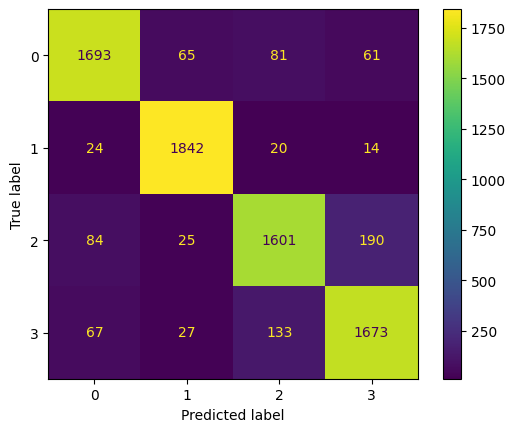

In [35]:
ConfusionMatrixDisplay(confusion_matrix(test_y, preds)).plot()